In [ ]:
# %pip install gensim scikit-learn matplotlib nltk


In [6]:

# Import libraries
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAGAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SAGAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [7]:
# Linkin Park–related corpus (original, non-lyrical sentences)
corpus = [
    "Linkin Park is an influential rock band",
    "The band blends rock rap and electronic sounds",
    "Chester Bennington was known for powerful vocals",
    "Linkin Park songs express emotion and energy"
]

# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print("Tokenized Corpus:")
print(tokenized_corpus)

# Train Word2Vec model
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

# Save and load the model
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

# Extract word vectors
words = list(model.wv.index_to_key)[:10]
print("\nWords used for visualization:")
print(words)

word_vectors = [model.wv[word] for word in words]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)


Tokenized Corpus:
[['linkin', 'park', 'is', 'an', 'influential', 'rock', 'band'], ['the', 'band', 'blends', 'rock', 'rap', 'and', 'electronic', 'sounds'], ['chester', 'bennington', 'was', 'known', 'for', 'powerful', 'vocals'], ['linkin', 'park', 'songs', 'express', 'emotion', 'and', 'energy']]

Words used for visualization:
['and', 'band', 'rock', 'park', 'linkin', 'energy', 'emotion', 'express', 'songs', 'vocals']


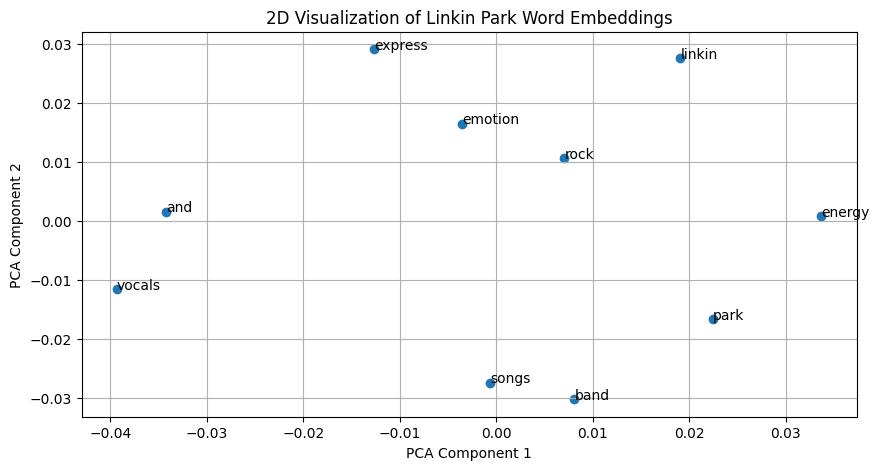

In [8]:

# Plot the word embeddings
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Linkin Park Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()